# MetaModeling for BBN interpretation
## Introduction 
 This notebook contatins all codes and results for the sensitivity analysis we did for the Bayesian belief network.
 The Objective here is to explore how each intensification strategy is affected by different configration of the   parent nodes. In our BBN we have 7 states for our target node 'Intensification strategy', each states representing one intensification strategy or the combination of strategies. For the sensitivity Analysis we generated a parameters for the observed nodes using nearly orthogonal Latin Hypercube designs (Susan M. Sanchez, 2005). And for each combination of the observed nodes configration we calculated the probabilities of each state. 

## Methods
This notebook contains four different models.
1. OLS regression
2. GLM regression with a logit link function 
3. Regression tree
4. Random Forest regression



In [3]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
#Read the data
DataFrame = pd.read_csv("probabilities4.txt", sep=",")

In [5]:
#Look the data frame
DataFrame.head(5)

,ageOfTheHouseholdHead,householdSize,farmSize,shareOfHiredLabour,commercializationIndex,totalLabourManDays,farmType,creditaccess,cropChoice,perCapitaIncome,percentNonfarmIncome,topgraphicWetnessIndex,distanceToBigMarket,None,CropMultipleTimes,ApplyFertilizer,ApplyImprovedSeed,UseIrrigationAndFertilizerApplication,UseIrrigation,Other
0,50,10,10.30,61,62.89,899.96,AgroPastoralist,No,RiceAndMaize,626675,20.49,21.15,4.88,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
1,32,5,14.36,96,71.88,538.28,AgroPastoralist,No,VegitAndRice,2337478,53.75,27.27,63.00,0.000010,0.000010,0.000010,0.999940,0.000010,0.000010,0.000010
2,34,7,2.43,56,96.09,815.31,AgroPastoralist,No,RiceMaizeAndVegit,1562078,17.47,18.73,8.99,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
3,50,3,7.07,63,73.05,749.90,AgroPastoralist,No,RiceAndMaize,2140551,80.63,27.94,60.82,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
4,48,7,10.62,41,92.97,796.07,AgroPastoralist,No,Rice,2989798,7.39,15.44,20.86,0.624996,0.000001,0.000001,0.125000,0.000001,0.249999,0.000001


In [6]:
#Check the types and missing values of the data frame
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 20 columns):
ageOfTheHouseholdHead                    257 non-null int64
householdSize                            257 non-null int64
farmSize                                 257 non-null float64
shareOfHiredLabour                       257 non-null int64
commercializationIndex                   257 non-null float64
totalLabourManDays                       257 non-null float64
farmType                                 257 non-null object
creditaccess                             257 non-null object
cropChoice                               257 non-null object
perCapitaIncome                          257 non-null int64
percentNonfarmIncome                     257 non-null float64
topgraphicWetnessIndex                   257 non-null float64
distanceToBigMarket                      257 non-null float64
None                                     257 non-null float64
CropMultipleTimes                     

In [7]:
#Encode our nominal variables as catagorical variables
DataFrame['farmType'] = DataFrame['farmType'].astype('category')
DataFrame['creditaccess'] = DataFrame['creditaccess'].astype('category')
DataFrame['cropChoice'] = DataFrame['cropChoice'].astype('category')


In [8]:
#List of catagorical variables
CatagoricalVariables = ['farmType', 'creditaccess', 'cropChoice']

In [9]:
#copy of the data frame
DataFrame2 = DataFrame

In [10]:
DataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 20 columns):
ageOfTheHouseholdHead                    257 non-null int64
householdSize                            257 non-null int64
farmSize                                 257 non-null float64
shareOfHiredLabour                       257 non-null int64
commercializationIndex                   257 non-null float64
totalLabourManDays                       257 non-null float64
farmType                                 257 non-null category
creditaccess                             257 non-null category
cropChoice                               257 non-null category
perCapitaIncome                          257 non-null int64
percentNonfarmIncome                     257 non-null float64
topgraphicWetnessIndex                   257 non-null float64
distanceToBigMarket                      257 non-null float64
None                                     257 non-null float64
CropMultipleTimes               

In [11]:
DataFrame.head(5)

,ageOfTheHouseholdHead,householdSize,farmSize,shareOfHiredLabour,commercializationIndex,totalLabourManDays,farmType,creditaccess,cropChoice,perCapitaIncome,percentNonfarmIncome,topgraphicWetnessIndex,distanceToBigMarket,None,CropMultipleTimes,ApplyFertilizer,ApplyImprovedSeed,UseIrrigationAndFertilizerApplication,UseIrrigation,Other
0,50,10,10.30,61,62.89,899.96,AgroPastoralist,No,RiceAndMaize,626675,20.49,21.15,4.88,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
1,32,5,14.36,96,71.88,538.28,AgroPastoralist,No,VegitAndRice,2337478,53.75,27.27,63.00,0.000010,0.000010,0.000010,0.999940,0.000010,0.000010,0.000010
2,34,7,2.43,56,96.09,815.31,AgroPastoralist,No,RiceMaizeAndVegit,1562078,17.47,18.73,8.99,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
3,50,3,7.07,63,73.05,749.90,AgroPastoralist,No,RiceAndMaize,2140551,80.63,27.94,60.82,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
4,48,7,10.62,41,92.97,796.07,AgroPastoralist,No,Rice,2989798,7.39,15.44,20.86,0.624996,0.000001,0.000001,0.125000,0.000001,0.249999,0.000001


In [12]:
#Encde the catagorical variables tointegers (rewuirement for most of the algorithms in sklearn)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for i in CatagoricalVariables:
    label_encoder = enc.fit(DataFrame2[i])
    print ("Categorical classes:", label_encoder.classes_)
    integer_class= label_encoder.transform(label_encoder.classes_)
    print ("Integer classes:", integer_class)
    t = label_encoder.transform(DataFrame2[i])
    DataFrame2[i] = t

('Categorical classes:', array([' AgroPastoralist', ' Diversifier', ' Subsistence'], dtype=object))
('Integer classes:', array([0, 1, 2]))
('Categorical classes:', array([' No', ' Yes'], dtype=object))
('Integer classes:', array([0, 1]))
('Categorical classes:', array([' Maize', ' Rice', ' RiceAndMaize', ' RiceMaizeAndVegit',
       ' VegitAndRice'], dtype=object))
('Integer classes:', array([0, 1, 2, 3, 4]))


In [13]:
DataFrame2.columns

Index([u'ageOfTheHouseholdHead', u'householdSize', u'farmSize',
       u'shareOfHiredLabour', u'commercializationIndex', u'totalLabourManDays',
       u'farmType', u'creditaccess', u'cropChoice', u'perCapitaIncome',
       u'percentNonfarmIncome', u'topgraphicWetnessIndex',
       u'distanceToBigMarket', u'None', u'CropMultipleTimes',
       u'ApplyFertilizer', u'ApplyImprovedSeed',
       u'UseIrrigationAndFertilizerApplication', u'UseIrrigation', u'Other'],
      dtype='object')

In [14]:
dependentVariables = ['ageOfTheHouseholdHead', 'householdSize', 'farmSize',
       'shareOfHiredLabour', 'commercializationIndex', 'totalLabourManDays',
       'farmType', 'creditaccess', 'cropChoice', 'perCapitaIncome',
       'percentNonfarmIncome', 'topgraphicWetnessIndex',
       'distanceToBigMarket']
outComeVariables =['None', 'CropMultipleTimes',
       'ApplyFertilizer', 'ApplyImprovedSeed',
       'UseIrrigationAndFertilizerApplication', 'UseIrrigation']

In [15]:
DataFrame2.head(20)

,ageOfTheHouseholdHead,householdSize,farmSize,shareOfHiredLabour,commercializationIndex,totalLabourManDays,farmType,creditaccess,cropChoice,perCapitaIncome,percentNonfarmIncome,topgraphicWetnessIndex,distanceToBigMarket,None,CropMultipleTimes,ApplyFertilizer,ApplyImprovedSeed,UseIrrigationAndFertilizerApplication,UseIrrigation,Other
0,50,10,10.30,61,62.89,899.96,0,0,2,626675,20.49,21.15,4.88,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
1,32,5,14.36,96,71.88,538.28,0,0,4,2337478,53.75,27.27,63.00,0.000010,0.000010,0.000010,0.999940,0.000010,0.000010,0.000010
2,34,7,2.43,56,96.09,815.31,0,0,3,1562078,17.47,18.73,8.99,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
3,50,3,7.07,63,73.05,749.90,0,0,2,2140551,80.63,27.94,60.82,0.555552,0.111111,0.222222,0.000001,0.111111,0.000001,0.000001
4,48,7,10.62,41,92.97,796.07,0,0,1,2989798,7.39,15.44,20.86,0.624996,0.000001,0.000001,0.125000,0.000001,0.249999,0.000001
5,52,5,16.29,16,86.33,907.66,1,0,3,1857468,72.23,27.60,53.07,0.000003,0.000003,0.333329,0.000003,0.666654,0.000003,0.000003
6,27,7,7.78,12,51.56,526.74,0,0,3,2263630,0.34,19.14,20.13,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
7,49,1,6.56,40,92.58,746.05,1,0,4,638983,39.98,23.64,51.13,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
8,29,6,15.84,63,38.67,788.38,1,0,2,1623617,81.30,18.46,29.34,0.399996,0.000002,0.199999,0.399996,0.000002,0.000002,0.000002
9,55,2,14.74,72,4.30,615.23,1,0,0,2780563,34.60,26.26,47.98,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [16]:
DataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 20 columns):
ageOfTheHouseholdHead                    257 non-null int64
householdSize                            257 non-null int64
farmSize                                 257 non-null float64
shareOfHiredLabour                       257 non-null int64
commercializationIndex                   257 non-null float64
totalLabourManDays                       257 non-null float64
farmType                                 257 non-null int64
creditaccess                             257 non-null int64
cropChoice                               257 non-null int64
perCapitaIncome                          257 non-null int64
percentNonfarmIncome                     257 non-null float64
topgraphicWetnessIndex                   257 non-null float64
distanceToBigMarket                      257 non-null float64
None                                     257 non-null float64
CropMultipleTimes                        

# Regression Tree
Since the target variable does not have classes, we fit a regression model to the target variable using each of the independent variables. Then for each independent variable, the data is split at several split points. At each split point, the "error" between the predicted value and the actual values is squared to get a "Sum of Squared Errors (SSE)". The split point errors across the variables are compared and the variable/point yielding the lowest SSE is chosen as the root node/split point. This process is recursively continued.

In [17]:
#A generic function to perform regression tree for all the outcome variables and also display feature importance
from sklearn import tree
import pydotplus
from IPython.display import IFrame
def doRegressionTree(Data, dependentVars, OutComeVar):
    model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, max_features=4, min_samples_leaf=10)
    for outCome in OutComeVar:
        print('***************************')
        print('***************************')
        print(outCome)
        print('***************************')
        model.fit(Data[dependentVars], Data[outCome])
       
        score = model.score(Data[dependentVars], Data[outCome])
        #print(score)
    
        print "Score is : %s" % "{0:.3%}".format(score)
        
        
        X = Data[dependentVars]
        importances = model.feature_importances_
        featureImportance = pd.Series(model.feature_importances_, index=dependentVars).sort_values(ascending=False)
        print featureImportance
        
        featureImportance.plot.bar(color ='r')
        plt.title("Feature Importance " + outCome)
        plt.show()
        
        
        
        # plot the decision tree
               
        dot_data = tree.export_graphviz(model, out_file=None, feature_names=dependentVars) 
        graph = pydotplus.graph_from_dot_data(dot_data) 
        graph.write_pdf(outCome+".pdf") 
        IFrame((outCome +".pdf"), width=600, height=600)
        
        

***************************
***************************
None
***************************
Score is : 26.803%
cropChoice                0.351555
percentNonfarmIncome      0.177630
perCapitaIncome           0.143619
totalLabourManDays        0.126226
householdSize             0.068475
farmSize                  0.048835
shareOfHiredLabour        0.038629
topgraphicWetnessIndex    0.025112
commercializationIndex    0.019919
distanceToBigMarket       0.000000
creditaccess              0.000000
farmType                  0.000000
ageOfTheHouseholdHead     0.000000
dtype: float64


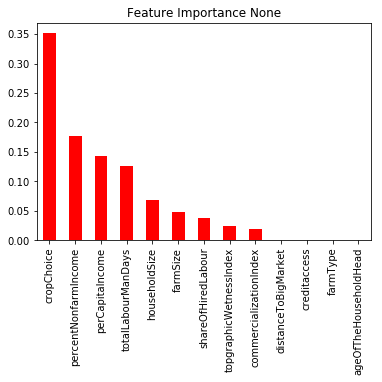

***************************
***************************
CropMultipleTimes
***************************
Score is : 61.148%
cropChoice                0.550345
ageOfTheHouseholdHead     0.248292
perCapitaIncome           0.060103
farmSize                  0.051569
commercializationIndex    0.036863
percentNonfarmIncome      0.034332
farmType                  0.013445
totalLabourManDays        0.005049
distanceToBigMarket       0.000000
topgraphicWetnessIndex    0.000000
creditaccess              0.000000
shareOfHiredLabour        0.000000
householdSize             0.000000
dtype: float64


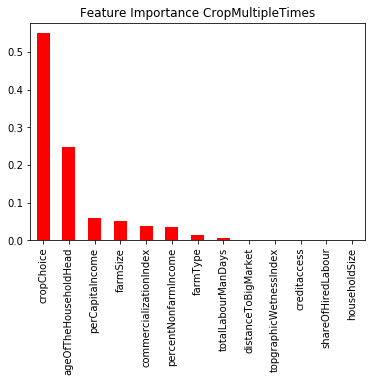

***************************
***************************
ApplyFertilizer
***************************
Score is : 11.212%
cropChoice                0.285614
perCapitaIncome           0.260252
commercializationIndex    0.164735
topgraphicWetnessIndex    0.126451
distanceToBigMarket       0.093133
totalLabourManDays        0.069815
percentNonfarmIncome      0.000000
creditaccess              0.000000
farmType                  0.000000
shareOfHiredLabour        0.000000
farmSize                  0.000000
householdSize             0.000000
ageOfTheHouseholdHead     0.000000
dtype: float64


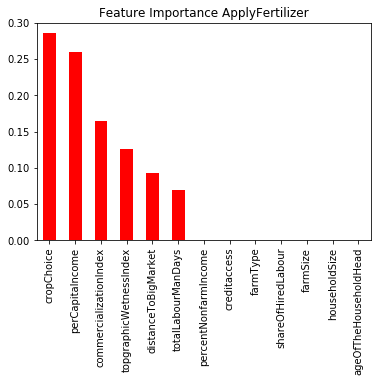

***************************
***************************
ApplyImprovedSeed
***************************
Score is : 44.479%
ageOfTheHouseholdHead     0.565584
distanceToBigMarket       0.211333
cropChoice                0.170300
perCapitaIncome           0.046187
commercializationIndex    0.006355
topgraphicWetnessIndex    0.000240
percentNonfarmIncome      0.000000
creditaccess              0.000000
farmType                  0.000000
totalLabourManDays        0.000000
shareOfHiredLabour        0.000000
farmSize                  0.000000
householdSize             0.000000
dtype: float64


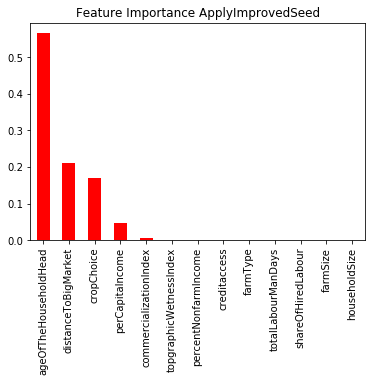

***************************
***************************
UseIrrigationAndFertilizerApplication
***************************
Score is : 42.363%
cropChoice                0.557297
commercializationIndex    0.127582
distanceToBigMarket       0.108776
farmSize                  0.080528
topgraphicWetnessIndex    0.043826
ageOfTheHouseholdHead     0.042058
perCapitaIncome           0.027863
farmType                  0.011968
shareOfHiredLabour        0.000102
percentNonfarmIncome      0.000000
creditaccess              0.000000
totalLabourManDays        0.000000
householdSize             0.000000
dtype: float64


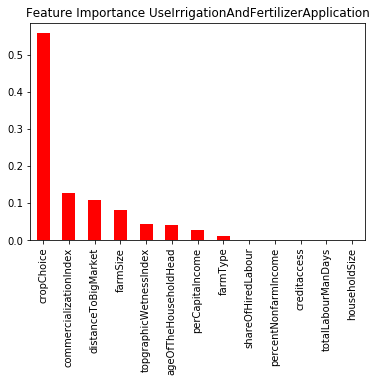

***************************
***************************
UseIrrigation
***************************
Score is : 43.317%
cropChoice                0.716040
topgraphicWetnessIndex    0.113696
farmType                  0.050066
shareOfHiredLabour        0.047078
totalLabourManDays        0.034123
ageOfTheHouseholdHead     0.027921
percentNonfarmIncome      0.011077
distanceToBigMarket       0.000000
perCapitaIncome           0.000000
creditaccess              0.000000
commercializationIndex    0.000000
farmSize                  0.000000
householdSize             0.000000
dtype: float64


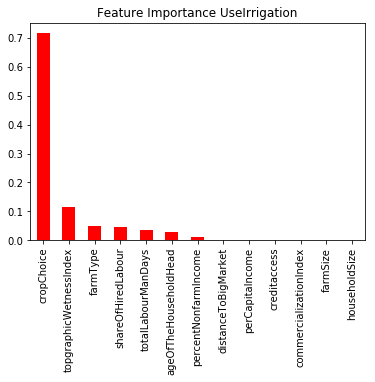

In [18]:
doRegressionTree(DataFrame2, dependentVariables, outComeVariables)

# Random Forest 
The general random forest algorithm can be decribed in the following four steps steps (ref: Python Machine Learning by Sebastian Raschka):

1. Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
   * Randomly select features without replacement.
   * Split the node using the feature that provides the best split according to the objective function, for instance,       by maximizing the information gain.
3. Repeat the steps 1 to 2k times.
4. Aggregate the prediction by each tree to assign the class label by majority vote.

Random forests don't provide the same level of interpretability as regressoin trees[no regression tree for display]. However, a big advantage of random forests is that as the ensemble model is quite robust and resistant to noise from the individual regression trees, we typically don't need to prune the random forest

In [19]:
#A function to do a randome forest regression for each of the intentesification strategy 
#and calculate the accuracy of the model 
#and also provide feature importance
from sklearn.ensemble import RandomForestRegressor

def doRandomForestRegression(Data, dependentVars, OutComeVar):
    model = RandomForestRegressor(n_estimators=25, min_samples_split=25, max_depth=7, min_samples_leaf=15)
    for outCome in OutComeVar:
        print('***************************')
        print('***************************')
        print(outCome)
        print('***************************')
        model.fit(Data[dependentVars], Data[outCome])
       
        score = model.score(Data[dependentVars], Data[outCome])
        #print(score)
    
        print "Score is : %s" % "{0:.3%}".format(score)
        
        X = Data[dependentVars]
        importances = model.feature_importances_
        featureImportance = pd.Series(importances, index=dependentVars).sort_values(ascending=False)
        print featureImportance
        
        featureImportance.plot.bar(color ='g')
        plt.title("Feature Importance " + outCome)
        plt.show()
        
        
        
    

***************************
***************************
None
***************************
Score is : 44.245%
cropChoice                0.618227
ageOfTheHouseholdHead     0.139937
distanceToBigMarket       0.048057
totalLabourManDays        0.043664
commercializationIndex    0.040448
farmSize                  0.036265
householdSize             0.024620
topgraphicWetnessIndex    0.012475
percentNonfarmIncome      0.011995
perCapitaIncome           0.011336
shareOfHiredLabour        0.010864
creditaccess              0.002111
farmType                  0.000000
dtype: float64


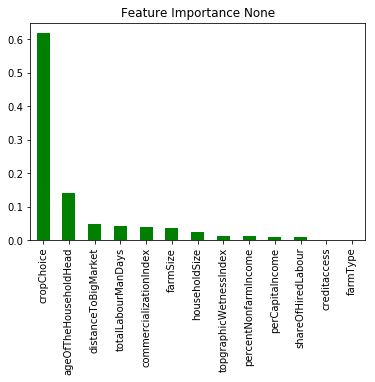

***************************
***************************
CropMultipleTimes
***************************
Score is : 70.981%
cropChoice                0.626111
ageOfTheHouseholdHead     0.271693
perCapitaIncome           0.086191
distanceToBigMarket       0.006261
commercializationIndex    0.003678
shareOfHiredLabour        0.003596
topgraphicWetnessIndex    0.001416
percentNonfarmIncome      0.000755
totalLabourManDays        0.000299
creditaccess              0.000000
farmType                  0.000000
farmSize                  0.000000
householdSize             0.000000
dtype: float64


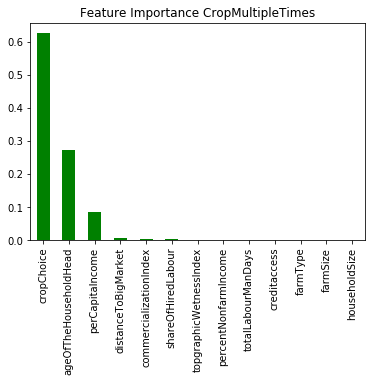

***************************
***************************
ApplyFertilizer
***************************
Score is : 50.131%
ageOfTheHouseholdHead     0.750043
cropChoice                0.104149
percentNonfarmIncome      0.047683
totalLabourManDays        0.018000
shareOfHiredLabour        0.014537
topgraphicWetnessIndex    0.014454
householdSize             0.013925
commercializationIndex    0.011213
farmSize                  0.010826
distanceToBigMarket       0.007258
perCapitaIncome           0.006060
creditaccess              0.001265
farmType                  0.000585
dtype: float64


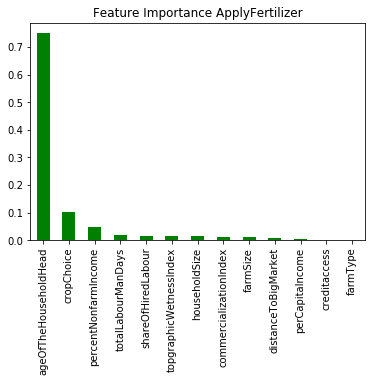

***************************
***************************
ApplyImprovedSeed
***************************
Score is : 50.483%
ageOfTheHouseholdHead     0.582569
cropChoice                0.386486
shareOfHiredLabour        0.016144
perCapitaIncome           0.009557
distanceToBigMarket       0.001491
percentNonfarmIncome      0.001332
farmType                  0.001118
commercializationIndex    0.000680
topgraphicWetnessIndex    0.000543
farmSize                  0.000079
creditaccess              0.000000
totalLabourManDays        0.000000
householdSize             0.000000
dtype: float64


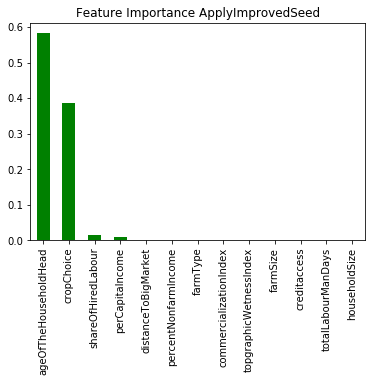

***************************
***************************
UseIrrigationAndFertilizerApplication
***************************
Score is : 76.972%
ageOfTheHouseholdHead     0.630977
cropChoice                0.353653
totalLabourManDays        0.003347
shareOfHiredLabour        0.003326
percentNonfarmIncome      0.002951
topgraphicWetnessIndex    0.002932
farmType                  0.001195
commercializationIndex    0.000873
distanceToBigMarket       0.000747
perCapitaIncome           0.000000
creditaccess              0.000000
farmSize                  0.000000
householdSize             0.000000
dtype: float64


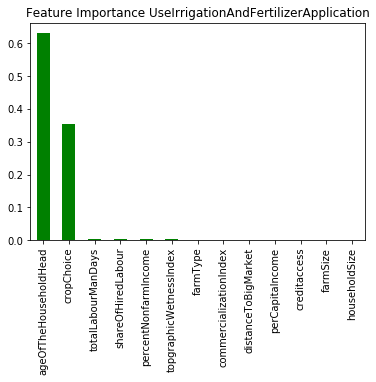

***************************
***************************
UseIrrigation
***************************
Score is : 51.196%
cropChoice                0.618046
ageOfTheHouseholdHead     0.190317
distanceToBigMarket       0.036318
topgraphicWetnessIndex    0.032509
perCapitaIncome           0.027830
shareOfHiredLabour        0.025617
farmSize                  0.018756
commercializationIndex    0.013933
totalLabourManDays        0.013602
percentNonfarmIncome      0.011940
creditaccess              0.004386
farmType                  0.004162
householdSize             0.002586
dtype: float64


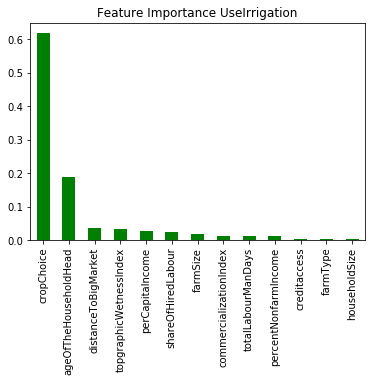

In [20]:
#call the randome forest function
doRandomForestRegression(DataFrame2, dependentVariables, outComeVariables)

In [21]:
# A function to estimate a OLS Regression

import statsmodels.api as sm
def doOLSRegression(Data, dependentVars, OutComeVar):
    for outCome in OutComeVar:
        model = sm.OLS(Data[outCome], Data[dependentVars])
        res = model.fit()
        print('************************************')
        print('OLS Regression for ' + outCome)
        print('************************************')
        print(res.summary())

In [22]:
#call the OLS function
doOLSRegression(DataFrame2, dependentVariables, outComeVariables)

************************************
OLS Regression for None
************************************
                            OLS Regression Results                            
Dep. Variable:                   None   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     29.63
Date:                Tue, 18 Jul 2017   Prob (F-statistic):           5.30e-43
Time:                        22:07:27   Log-Likelihood:                -36.145
No. Observations:                 257   AIC:                             98.29
Df Residuals:                     244   BIC:                             144.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------

In [23]:
#when the dependent variable is a proportion or fraction OLS estimated are biased 
#and provide predicated value less than 0 or greater than 1
#A better alternative is to estimate using glm with family(binomial), link(logit), 
#and robust; this is the method proposed by Papke and Wooldridge (1996)
#http://www.stata.com/support/faqs/statistics/logit-transformation/
from statsmodels.graphics.api import abline_plot
def doGLMRegression(Data, dependentVars, OutComeVar):
    for outCome in OutComeVar:
        model = sm.GLM(Data[outCome], Data[dependentVars], family=sm.families.Binomial())
        res = model.fit()
        print('************************************')
        print('GLM Regression for ' + outCome)
        print('************************************')
        print(res.summary())
        yhat = res.mu
        y =Data[outCome]
        fig, ax = plt.subplots()
        ax.scatter(yhat, y)
        line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
        abline_plot(model_results=line_fit, ax=ax)

        #plot the regression line between the actual probability values and 
        # the predicted probability values 

        ax.set_title('Model Fit Plot ' + outCome)
        ax.set_ylabel('Observed values')
        ax.set_xlabel('Fitted values');
        plt.show()


************************************
GLM Regression for None
************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   None   No. Observations:                  257
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -162.96
Date:                Tue, 18 Jul 2017   Deviance:                       222.92
Time:                        22:07:27   Pearson chi2:                     85.8
No. Iterations:                     7                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
ageOfTheH

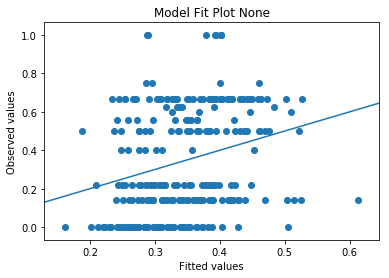

************************************
GLM Regression for CropMultipleTimes
************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:      CropMultipleTimes   No. Observations:                  257
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -75.040
Date:                Tue, 18 Jul 2017   Deviance:                       51.466
Time:                        22:07:27   Pearson chi2:                     46.7
No. Iterations:                     9                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------

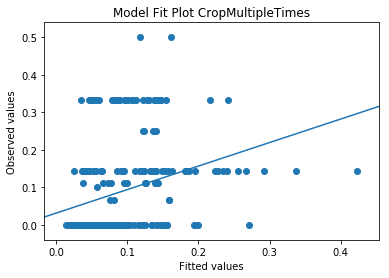

************************************
GLM Regression for ApplyFertilizer
************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:        ApplyFertilizer   No. Observations:                  257
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -72.919
Date:                Tue, 18 Jul 2017   Deviance:                       51.048
Time:                        22:07:27   Pearson chi2:                     44.7
No. Iterations:                     9                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------

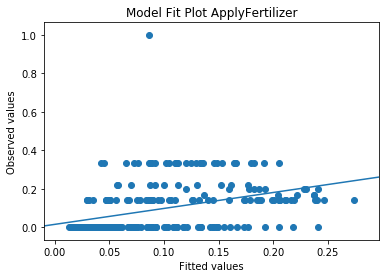

************************************
GLM Regression for ApplyImprovedSeed
************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:      ApplyImprovedSeed   No. Observations:                  257
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -120.26
Date:                Tue, 18 Jul 2017   Deviance:                       110.62
Time:                        22:07:27   Pearson chi2:                     68.8
No. Iterations:                     8                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------

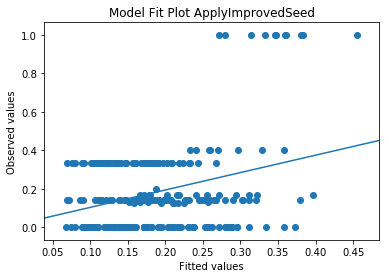

************************************
GLM Regression for UseIrrigationAndFertilizerApplication
************************************
                           Generalized Linear Model Regression Results                           
Dep. Variable:     UseIrrigationAndFertilizerApplication   No. Observations:                  257
Model:                                               GLM   Df Residuals:                      244
Model Family:                                   Binomial   Df Model:                           12
Link Function:                                     logit   Scale:                             1.0
Method:                                             IRLS   Log-Likelihood:                -114.99
Date:                                   Tue, 18 Jul 2017   Deviance:                       140.93
Time:                                           22:07:28   Pearson chi2:                     128.
No. Iterations:                                        8                             

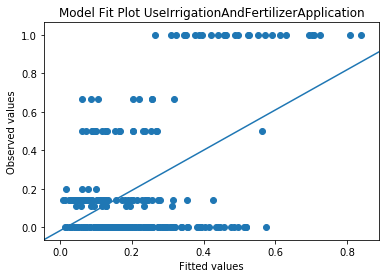

************************************
GLM Regression for UseIrrigation
************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:          UseIrrigation   No. Observations:                  257
Model:                            GLM   Df Residuals:                      244
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -46.709
Date:                Tue, 18 Jul 2017   Deviance:                       26.892
Time:                        22:07:28   Pearson chi2:                     26.7
No. Iterations:                    10                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------


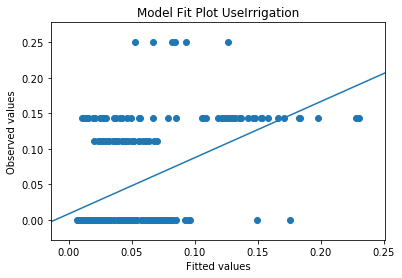

In [24]:
#call for the GLM function
doGLMRegression(DataFrame2, dependentVariables, outComeVariables)

RegressionTree for None


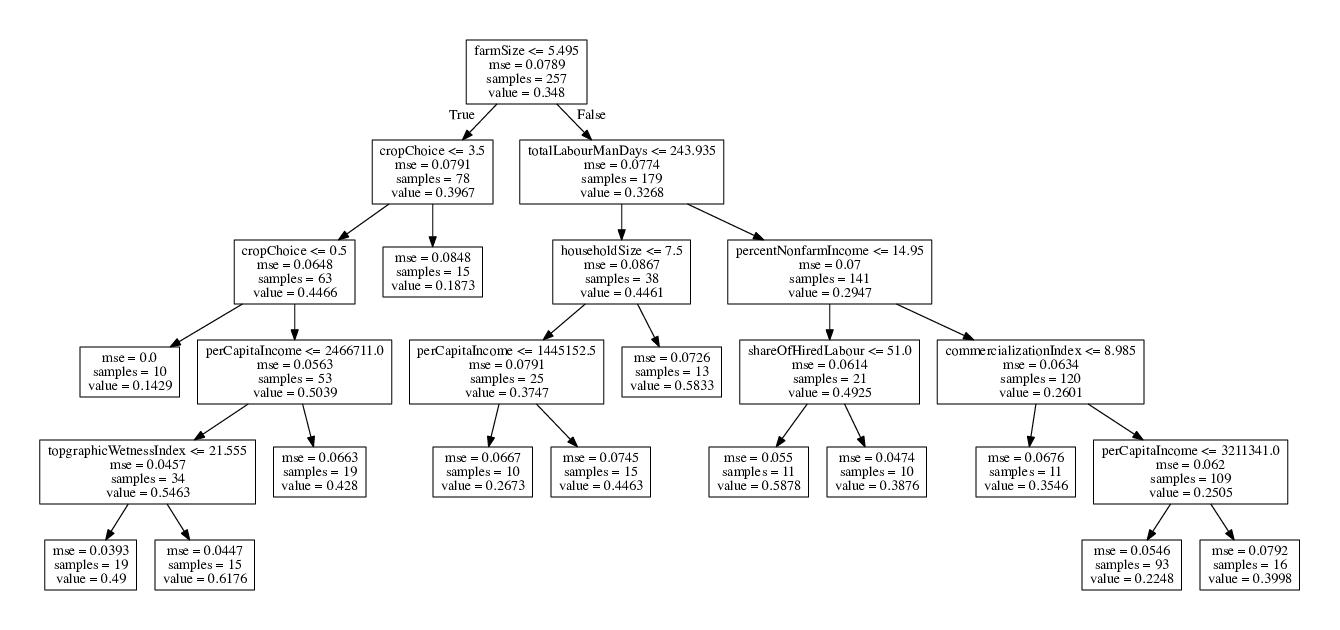

RegressionTree for CropMultipleTimes


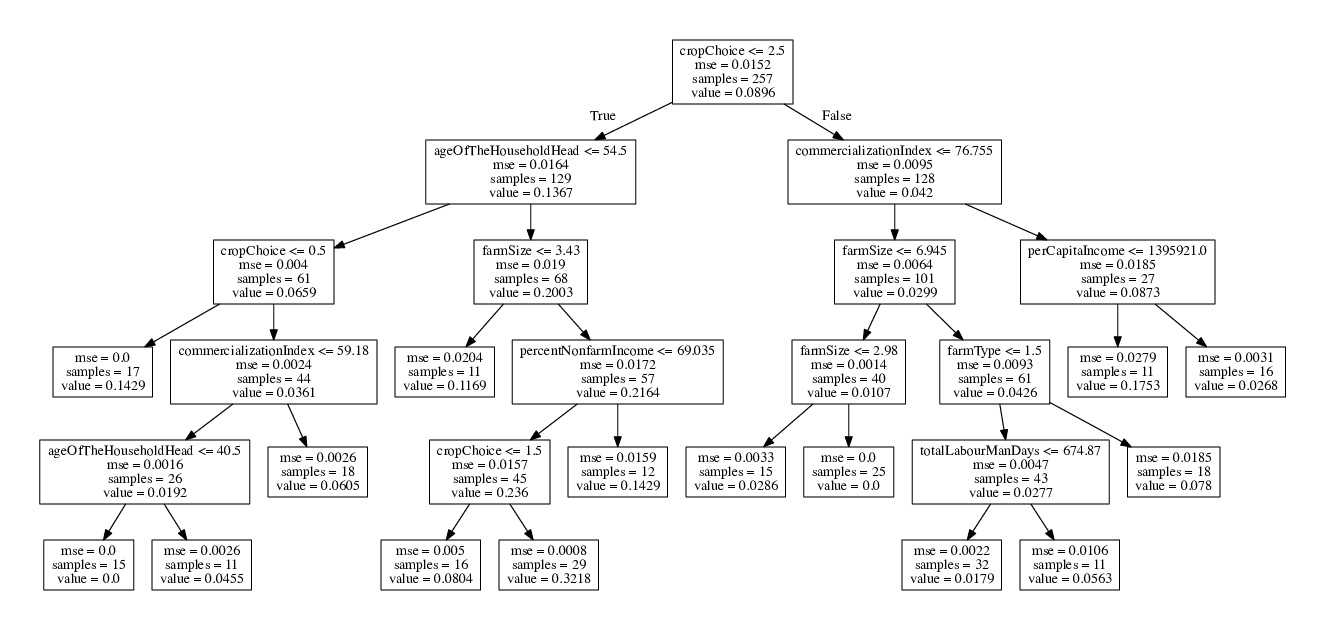

RegressionTree for ApplyFertilizer


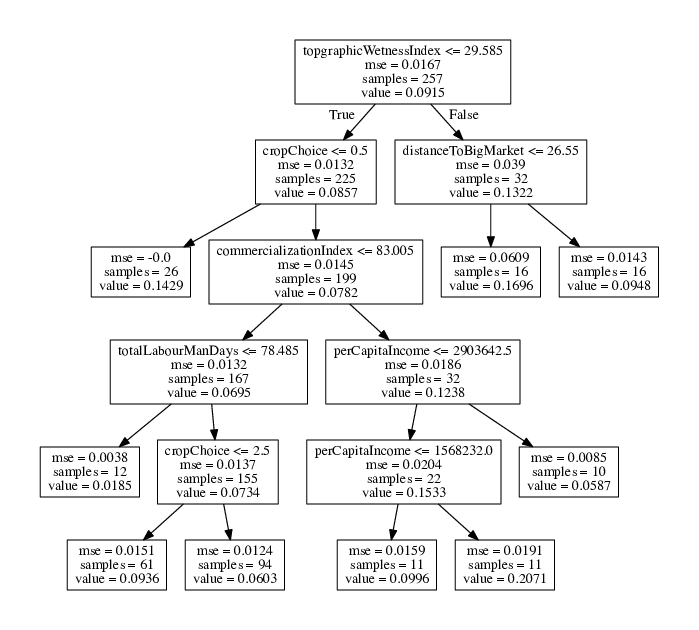

RegressionTree for ApplyImprovedSeed


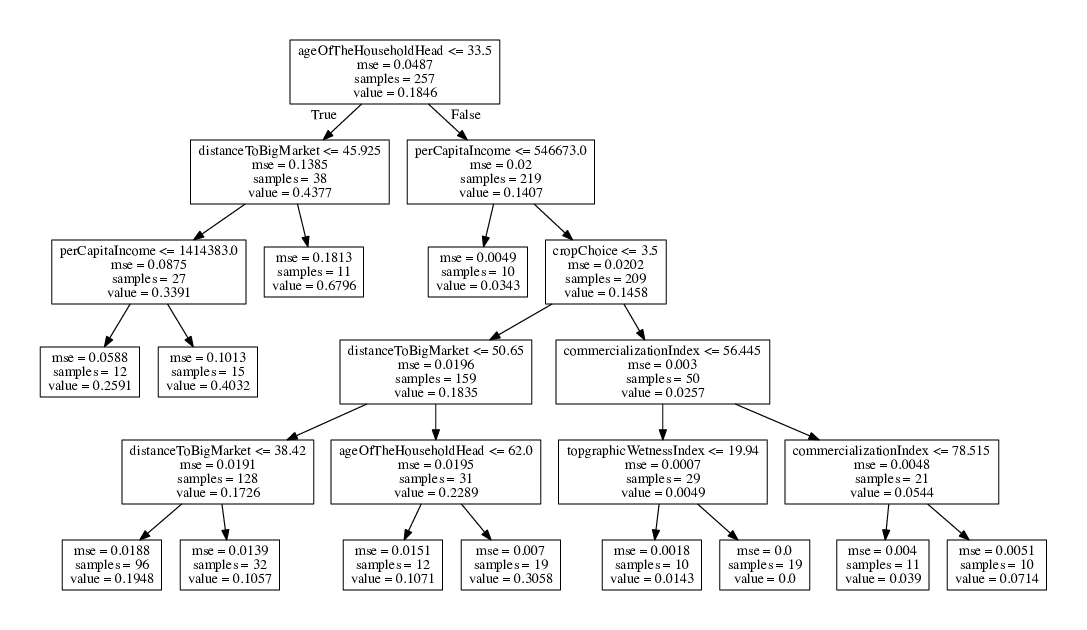

RegressionTree for UseIrrigationAndFertilizerApplication


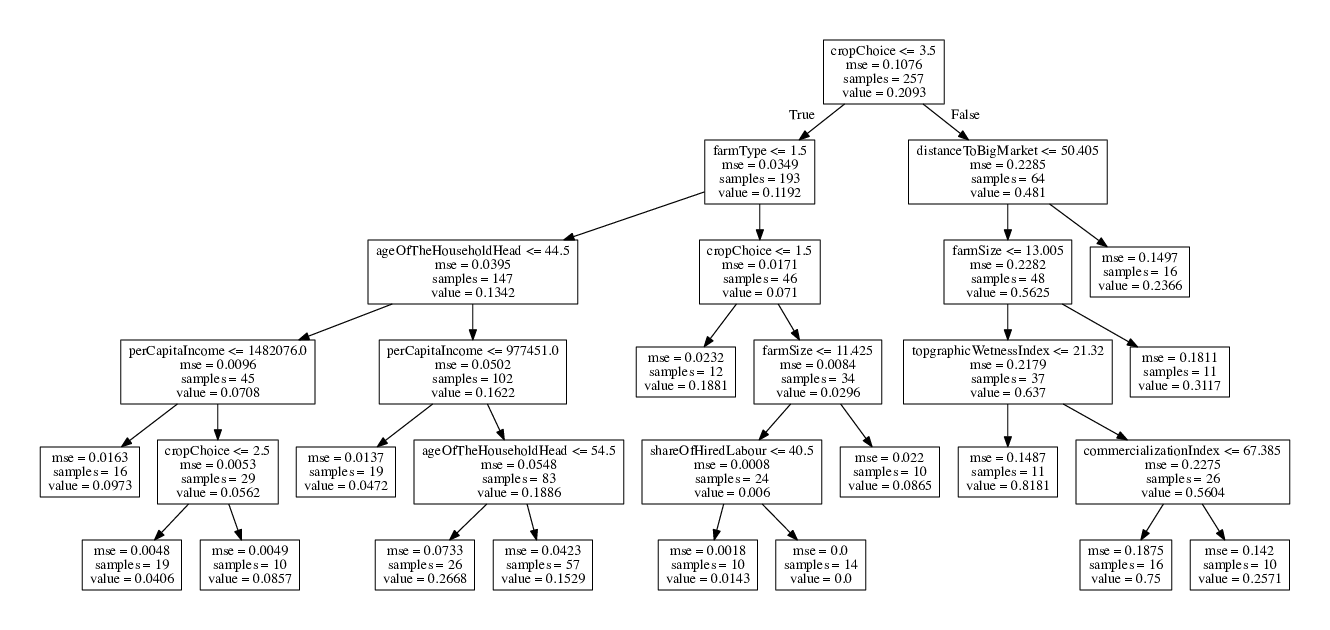

RegressionTree for UseIrrigation


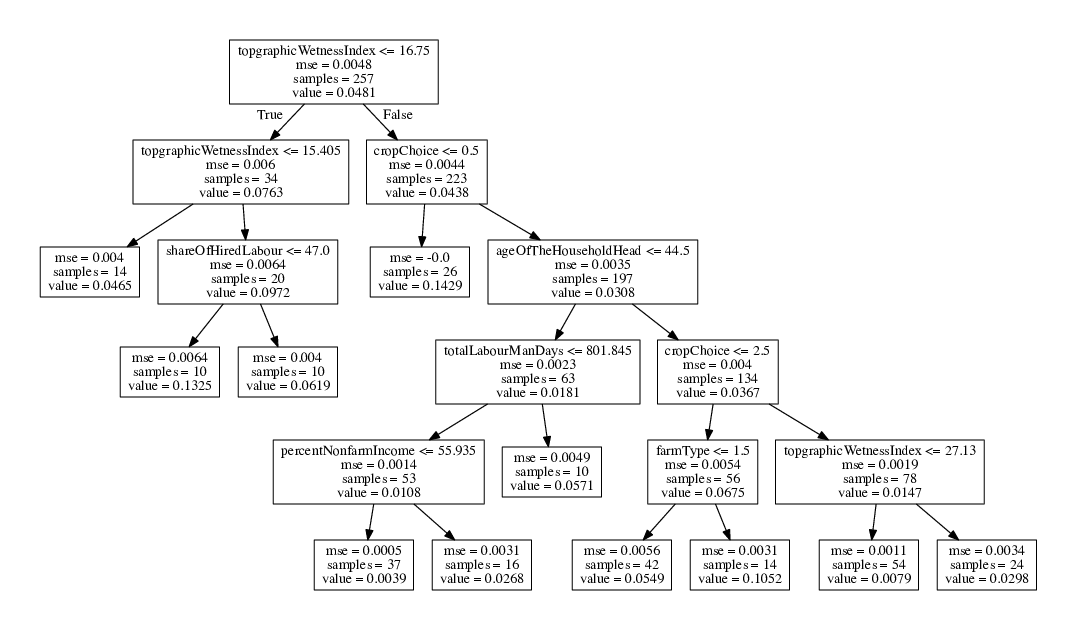

In [25]:
#Display the regression trees generated
from wand.image import Image as WImage
from IPython.display import display
for name in outComeVariables:
    print('==================================================')
    print('RegressionTree for ' + name)
    print('==================================================')
    img = WImage(filename=name+'.pdf', height=900, width=900)
    display(img)
